In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

In [32]:
path = r'telecom_churn.csv'

df = pd.read_csv(path)

df.shape

(100000, 10)

In [33]:
df.head()

,CustomerID,Gender,Age,Tenure,PhoneService,InternetService,Streaming,MonthlyCharges,TotalCharges,Churn
0,1,NaN,39.0,6.0,Yes,No,No,20.00,209.33,0
1,2,Female,54.0,14.0,Yes,Fiber optic,Yes,91.96,1241.22,0
2,3,Male,47.0,18.0,NaN,Fiber optic,Yes,86.05,1484.38,0
3,4,Male,30.0,6.0,Yes,DSL,Yes,NaN,NaN,0
4,5,Male,61.0,10.0,Yes,Fiber optic,NaN,90.00,885.41,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CustomerID       100000 non-null  int64  
 1   Gender           85076 non-null   object 
 2   Age              85162 non-null   float64
 3   Tenure           85062 non-null   float64
 4   PhoneService     85093 non-null   object 
 5   InternetService  84993 non-null   object 
 6   Streaming        84974 non-null   object 
 7   MonthlyCharges   85013 non-null   float64
 8   TotalCharges     84924 non-null   float64
 9   Churn            100000 non-null  int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 7.6+ MB


In [35]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges,Churn
count,100000.000000,85162.000000,85062.000000,85013.000000,84924.000000,100000.000000
mean,50000.500000,39.705972,11.543027,65.929665,766.710062,0.188160
std,28867.657797,11.629398,11.877483,30.242435,932.767136,0.390842
min,1.000000,18.000000,0.000000,20.000000,0.000000,0.000000
25%,25000.750000,31.000000,3.000000,47.040000,152.710000,0.000000
50%,50000.500000,40.000000,8.000000,62.760000,437.835000,0.000000
75%,75000.250000,48.000000,16.000000,93.330000,1030.300000,0.000000
max,100000.000000,80.000000,72.000000,120.000000,8644.650000,1.000000


In [36]:
df.isna().sum()

CustomerID             0
Gender             14924
Age                14838
Tenure             14938
PhoneService       14907
InternetService    15007
Streaming          15026
MonthlyCharges     14987
TotalCharges       15076
Churn                  0
dtype: int64

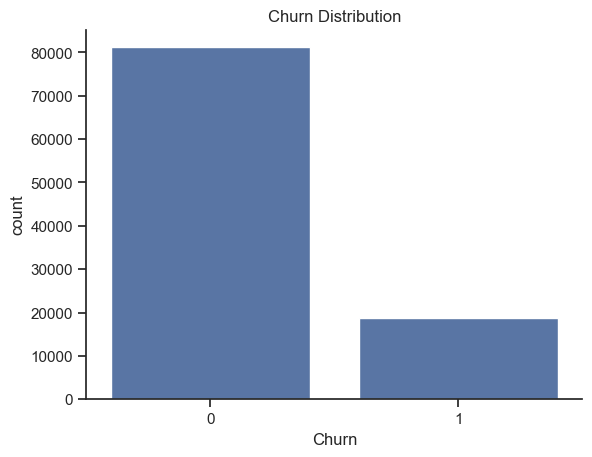

In [37]:
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

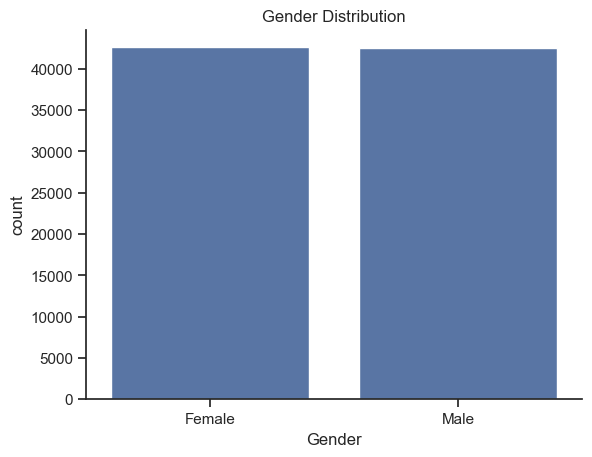

In [38]:
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.show()

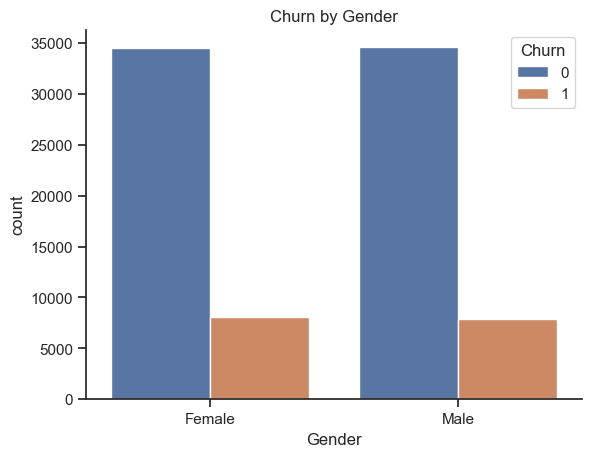

In [39]:
sns.countplot(x='Gender', hue='Churn', data=df)
plt.title("Churn by Gender")
plt.show()

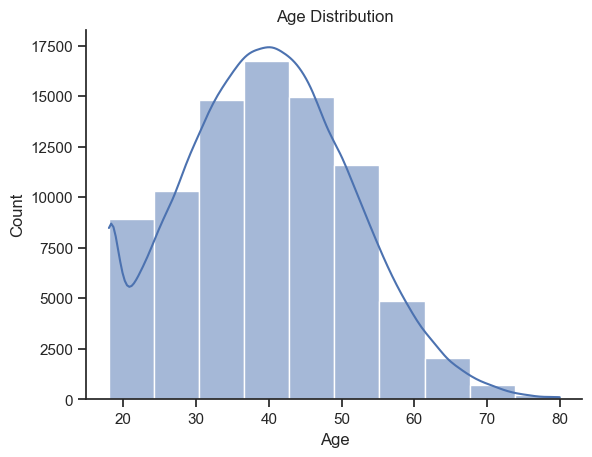

In [40]:
# 4. Age distribution
sns.histplot(df['Age'], bins=10, kde=True)
plt.title("Age Distribution")
plt.show()

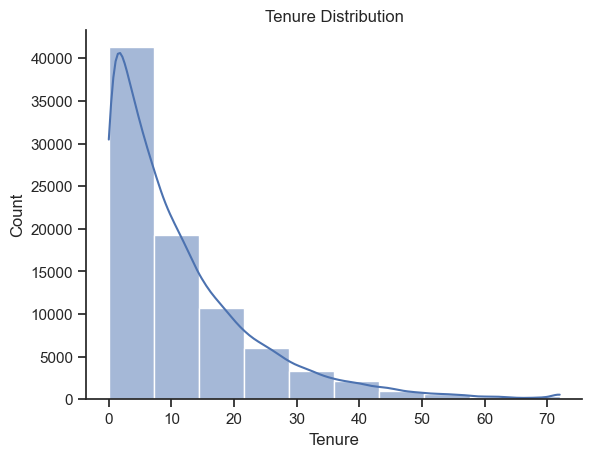

In [41]:
sns.histplot(df['Tenure'], bins=10, kde=True)
plt.title("Tenure Distribution")
plt.show()

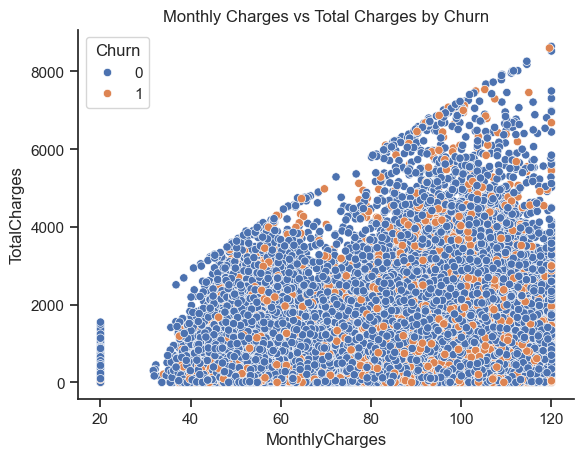

In [42]:
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Churn', data=df)
plt.title("Monthly Charges vs Total Charges by Churn")
plt.show()


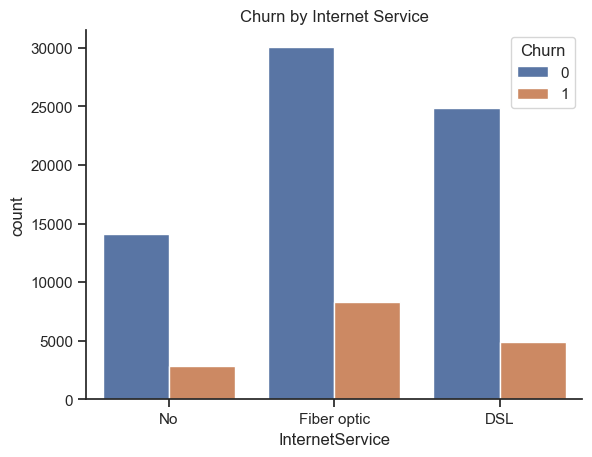

In [43]:
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title("Churn by Internet Service")
plt.show()

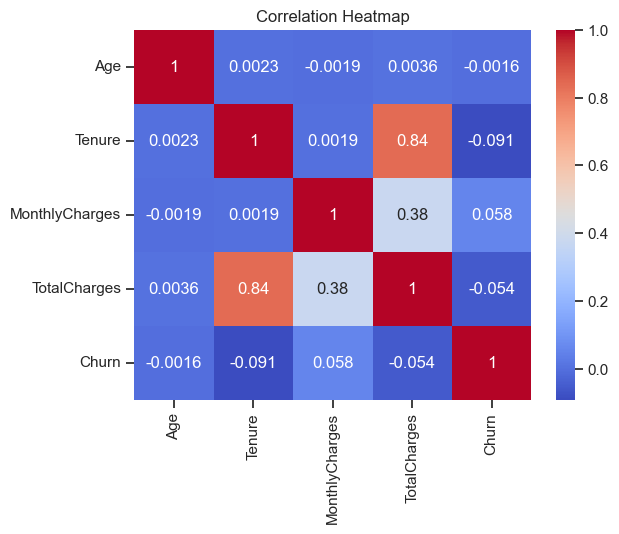

In [44]:
numeric_cols_with_churn = ["Age", "Tenure", "MonthlyCharges", "TotalCharges", "Churn"]
sns.heatmap(df[numeric_cols_with_churn].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

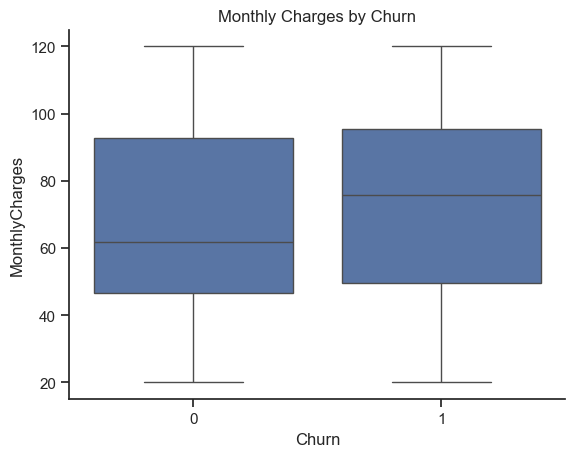

In [45]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges by Churn")
plt.show()

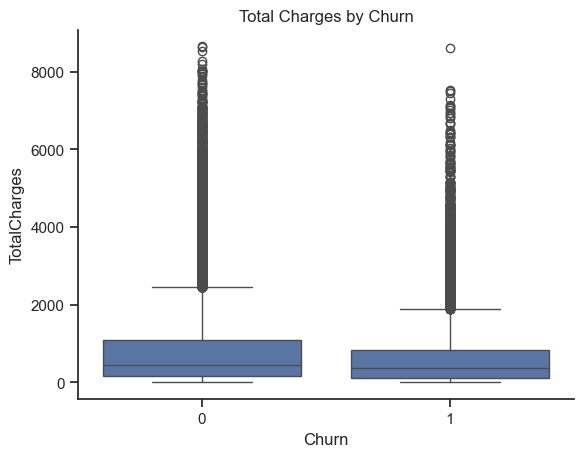

In [46]:
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title("Total Charges by Churn")
plt.show()

In [47]:
def remove_outlier(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 0.5 * IQR
    
    df_filtered = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df_filtered
    
df = remove_outlier(df, "TotalCharges")

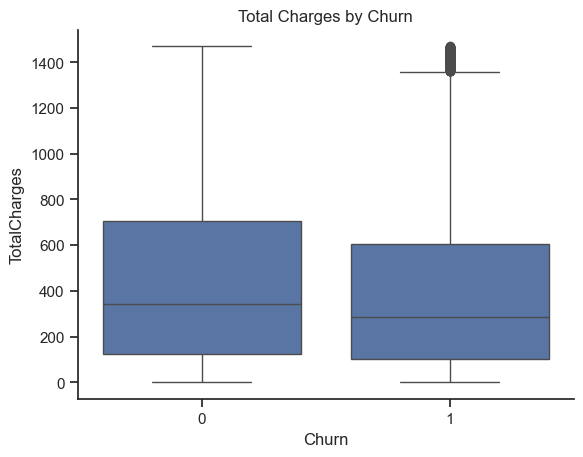

In [48]:
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title("Total Charges by Churn")
plt.show()

#### Summarize the finding in EDA part

The dataset is imbalanced, with more non-churned customers than churned ones. Age and gender distributions are balanced and don’t show a strong relationship with churn. Many customers churn within their first year of service. Customers with higher monthly charges are more likely to churn, but churned customers have lower total charges due to their short tenure. Tenure and total charges are strongly correlated. The type of internet service appears to be the most significant factor for churn. Customers with Fibre optic internet service have the highest churn rate. The relationship between churn and numerical features like Age and Charges isn’t strongly linear. Churn is a bigger problem for new customers and those with specific service types.

In [49]:
df['SeniorCitizen'] = df['Age'].apply(lambda x: 1 if x >= 65 else 0)

In [50]:
bins = [0, 12, 24, 48, 60, 100]
labels = ['0-12_mo', '13-24_mo', '25-48_mo', '49-60_mo', '>60_mo']
df['Tenure_Group'] = pd.cut(df['Tenure'], bins=bins, labels=labels, right=False)

In [51]:
df['Monthly_Charge_Per_Tenure'] = np.round(df['MonthlyCharges'] / (df['Tenure'] + 0.1),2)

In [52]:
df.head()

,CustomerID,Gender,Age,Tenure,PhoneService,InternetService,Streaming,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Tenure_Group,Monthly_Charge_Per_Tenure
0,1,NaN,39.0,6.0,Yes,No,No,20.00,209.33,0,0,0-12_mo,3.28
1,2,Female,54.0,14.0,Yes,Fiber optic,Yes,91.96,1241.22,0,0,13-24_mo,6.52
4,5,Male,61.0,10.0,Yes,Fiber optic,NaN,90.00,885.41,0,0,0-12_mo,8.91
5,6,Female,21.0,13.0,NaN,Fiber optic,Yes,98.70,1255.55,0,0,13-24_mo,7.53
6,7,NaN,43.0,NaN,Yes,Fiber optic,No,NaN,439.27,1,0,NaN,NaN


In [53]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

def build_pipeline(num_features, cat_features):

    num_pipeline = Pipeline(steps=[
        ('num_impute', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])
    
    cat_pipeline = Pipeline(steps=[
        ('cat_imputer', SimpleImputer(strategy='most_frequent')),
        ('One_hot', OneHotEncoder(handle_unknown='ignore'))
    ])
    
    preprocessor = ColumnTransformer(transformers=[
        ('num', num_pipeline, num_features),
        ('cat', cat_pipeline, cat_features)
    ])
    
    return preprocessor

In [54]:
y = df['Churn']
X = df.drop('Churn', axis=1)

In [55]:
num_features = X.select_dtypes(include='number').columns.to_list()
cat_features = X.select_dtypes(include='object').columns.to_list()
preprocessor = build_pipeline(num_features, cat_features)

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

''' 
Reason to Choose Models:
1. Logistic Regression:  
   This is an excellent baseline model. It is simple, highly interpretable, and computationally efficient. It's a good choice to start with to get a sense of the problem and establish a benchmark performance.

2. Random Forest Classifier:
   This is a powerful and versatile tree-based ensemble method. It is known for its ability to handle non-linear relationships and its robustness against overfitting. It's a great choice for this type of mixed-feature data and often provides high accuracy without extensive hyperparameter tuning.

3. Gradient Boosting Classifier:
   This is a more advanced ensemble method that typically delivers top-tier performance on structured datasets. By building trees sequentially and correcting the errors of previous trees, it can capture complex patterns in the data. This would be a strong candidate for achieving the best possible accuracy.
'''

param_grids = {
    'Logistic Regression Classifier': {
        'classifier__C': [0.1, 1.0, 10.0, 100.0],
        'classifier__solver': ['liblinear', 'lbfgs'],
        'classifier__penalty': ['l1', 'l2']
    },
    'RandomForest Classifier': {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    },
    'GradientBoosting Classifier': {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__max_depth': [3, 5, 7],
        'classifier__subsample': [0.8, 0.9, 1.0]
    }
}

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

clas_models = {
    'Logistic Regression Classifier': LogisticRegression(max_iter=1000),
    'RandomForest Classifier': RandomForestClassifier(),
    'GradientBoosting Classifier': GradientBoostingClassifier()
}

results_clf = {}

for name, model in clas_models.items():
    print(f"\nRunning {name}...")

    # Create pipeline with preprocessor
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Prepare param grid for GridSearchCV
    param_grid = param_grids[name]

    # GridSearchCV
    grid = GridSearchCV(
        pipeline,
        param_grid,
        cv=2,
        scoring='accuracy',
        n_jobs=-1
    )

    # Fit
    grid.fit(X_train, y_train)

    # Predict & evaluate
    y_pred = grid.predict(X_test)
    metrics = {
        "accuracy": accuracy_score(y_test, y_pred),
        "f1_score": f1_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred)
    }

    # Store results
    results_clf[name] = {
        "best_params": grid.best_params_,
        "metrics": metrics
    }

    print(f"Best Params for {name}: {grid.best_params_}")
    print(f"Metrics: {metrics}")


Running Logistic Regression Classifier...
Best Params for Logistic Regression Classifier: {'classifier__C': 0.1, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Metrics: {'accuracy': 0.8008797039726314, 'f1_score': 0.0, 'precision': 0.0, 'recall': 0.0}

Running RandomForest Classifier...
Best Params for RandomForest Classifier: {'classifier__max_depth': 20, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 300}
Metrics: {'accuracy': 0.8008797039726314, 'f1_score': 0.000700770847932726, 'precision': 0.5, 'recall': 0.0003506311360448808}

Running GradientBoosting Classifier...
Best Params for GradientBoosting Classifier: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 5, 'classifier__n_estimators': 100, 'classifier__subsample': 0.9}
Metrics: {'accuracy': 0.8008797039726314, 'f1_score': 0.0, 'precision': 0.0, 'recall': 0.0}


In [59]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, precision_recall_curve, classification_report
import numpy as np

imb_cls_models = {
    'Logistic Regression Classifier': LogisticRegression(class_weight='balanced', max_iter=1000),
    'RandomForest Classifier': RandomForestClassifier(class_weight='balanced', random_state=42),
    'GradientBoosting Classifier': GradientBoostingClassifier(random_state=42)
}

results_clf = {}
trained_models = {}   # will hold each trained pipeline

for name, model in imb_cls_models.items():
    print(f"\nRunning {name}...")

    # Pipeline with preprocessor + SMOTE + classifier
    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', model)
    ])

    param_grid = param_grids[name]

    grid = GridSearchCV(
        pipeline,
        param_grid,
        cv=2,
        scoring='f1',
        n_jobs=-1
    )

    grid.fit(X_train, y_train)

    # store the trained pipeline
    trained_models[name] = grid.best_estimator_

    # metrics at default threshold
    y_pred = grid.predict(X_test)
    metrics = {
        "accuracy": accuracy_score(y_test, y_pred),
        "f1_score": f1_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred)
    }

    # threshold tuning on the same trained model
    y_prob = grid.best_estimator_.predict_proba(X_test)[:, 1]
    prec, rec, thresh = precision_recall_curve(y_test, y_prob)
    f1_vals = 2 * prec * rec / (prec + rec + 1e-10)
    best_idx = np.argmax(f1_vals)
    best_thresh = thresh[best_idx]
    y_pred_thresh = (y_prob >= best_thresh).astype(int)

    tuned_metrics = {
        "accuracy": accuracy_score(y_test, y_pred_thresh),
        "f1_score": f1_score(y_test, y_pred_thresh),
        "precision": precision_score(y_test, y_pred_thresh),
        "recall": recall_score(y_test, y_pred_thresh),
        "best_threshold": best_thresh
    }

    results_clf[name] = {
        "best_params": grid.best_params_,
        "metrics_default": metrics,
        "metrics_tuned": tuned_metrics
    }

    print(f"Best Params for {name}: {grid.best_params_}")
    print(f"Metrics (default threshold): {metrics}")
    print(f"Metrics (tuned threshold {best_thresh:.3f}): {tuned_metrics}")
    print(classification_report(y_test, y_pred_thresh))


Running Logistic Regression Classifier...
Best Params for Logistic Regression Classifier: {'classifier__C': 100.0, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Metrics (default threshold): {'accuracy': 0.5371779655100188, 'f1_score': 0.34138102334823645, 'precision': 0.23818106197144046, 'recall': 0.6023842917251052}
Metrics (tuned threshold 0.436): {'accuracy': 0.35648956224254696, 'f1_score': 0.3548680618744313, 'precision': 0.22168780061215565, 'recall': 0.8888499298737728, 'best_threshold': np.float64(0.4355105560571638)}
              precision    recall  f1-score   support

           0       0.89      0.22      0.36     11471
           1       0.22      0.89      0.35      2852

    accuracy                           0.36     14323
   macro avg       0.56      0.56      0.36     14323
weighted avg       0.76      0.36      0.36     14323


Running RandomForest Classifier...
Best Params for RandomForest Classifier: {'classifier__max_depth': 10, 'classifier__m


Evaluating Logistic Regression Classifier...
Metrics (tuned threshold 0.436): {'accuracy': 0.35648956224254696, 'f1_score': 0.3548680618744313, 'precision': 0.22168780061215565, 'recall': 0.8888499298737728, 'best_threshold': np.float64(0.4355105560571638)}

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.22      0.36     11471
           1       0.22      0.89      0.35      2852

    accuracy                           0.36     14323
   macro avg       0.56      0.56      0.36     14323
weighted avg       0.76      0.36      0.36     14323



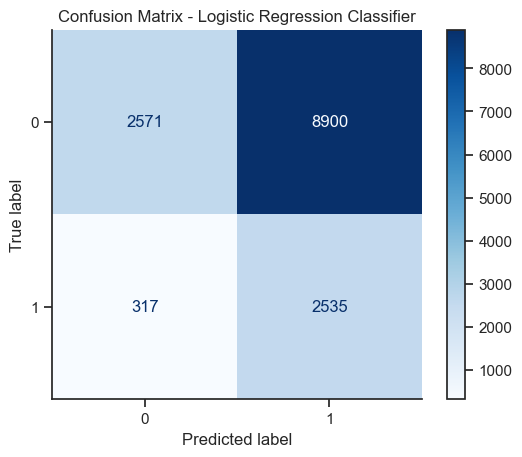


Evaluating RandomForest Classifier...
Metrics (tuned threshold 0.370): {'accuracy': 0.40424492075682467, 'f1_score': 0.35730963320027115, 'precision': 0.22752997601918465, 'recall': 0.8316970546984572, 'best_threshold': np.float64(0.37032376263010697)}

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.30      0.44     11471
           1       0.23      0.83      0.36      2852

    accuracy                           0.40     14323
   macro avg       0.55      0.56      0.40     14323
weighted avg       0.75      0.40      0.43     14323



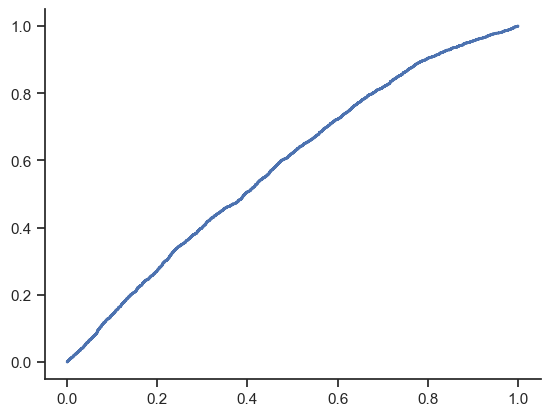

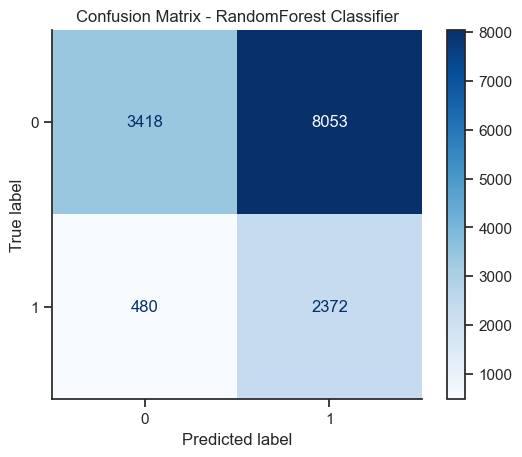


Evaluating GradientBoosting Classifier...
Metrics (tuned threshold 0.403): {'accuracy': 0.34832088249668364, 'f1_score': 0.35422720354227205, 'precision': 0.2206516117910705, 'recall': 0.8976157082748948, 'best_threshold': np.float64(0.4027482506871756)}

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.21      0.34     11471
           1       0.22      0.90      0.35      2852

    accuracy                           0.35     14323
   macro avg       0.56      0.55      0.35     14323
weighted avg       0.76      0.35      0.34     14323



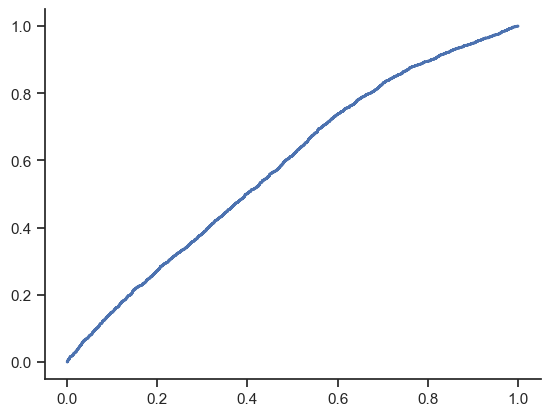

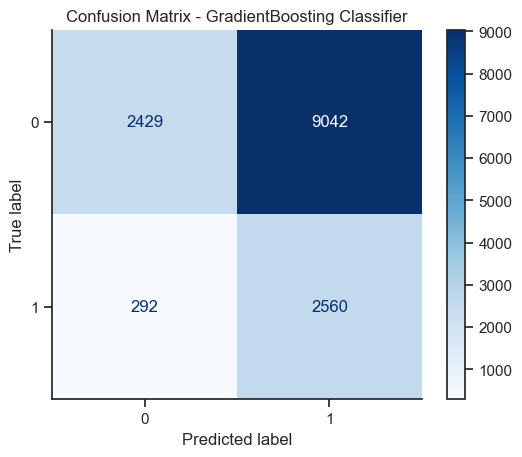

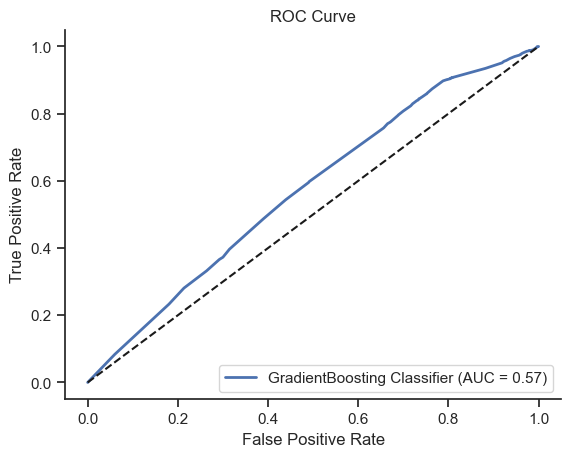

In [61]:
from sklearn.metrics import (classification_report, confusion_matrix, ConfusionMatrixDisplay,
                             roc_curve, auc, precision_recall_curve)


for name, model in trained_models.items():
    print(f"\nEvaluating {name}...")

    y_prob = model.predict_proba(X_test)[:, 1]
    prec, rec, thresh = precision_recall_curve(y_test, y_prob)
    f1_vals = 2 * prec * rec / (prec + rec + 1e-10)
    best_idx = np.argmax(f1_vals)
    best_thresh = thresh[best_idx]
    y_pred_thresh = (y_prob >= best_thresh).astype(int)

    # Metrics
    metrics_tuned = {
        "accuracy": accuracy_score(y_test, y_pred_thresh),
        "f1_score": f1_score(y_test, y_pred_thresh),
        "precision": precision_score(y_test, y_pred_thresh),
        "recall": recall_score(y_test, y_pred_thresh),
        "best_threshold": best_thresh
    }
    print(f"Metrics (tuned threshold {best_thresh:.3f}): {metrics_tuned}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_thresh))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_thresh)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Feature importance for tree-based models
for tree_name in ['Random Forest', 'Gradient Boosting']:
    if tree_name in trained_models:
        best_tree = trained_models[tree_name]
        clf = best_tree.named_steps["classifier"]
        feature_names = best_tree.named_steps["preprocessor"].get_feature_names_out()
        importances = clf.feature_importances_
        feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False).head(10)

        plt.figure(figsize=(8,6))
        plt.show()
